In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
anime=pd.read_csv("/content/anime.csv")
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [3]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [4]:
anime.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [5]:
for i in anime.isna().sum():
  print(i/len(anime)*100)

0.0
0.0
0.504311046038718
0.20335122824141857
0.0
1.8708312998210508
0.0


In [9]:
anime.dropna(subset=['genre','type'],inplace=True)

In [10]:
anime.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,193
members,0


<Axes: >

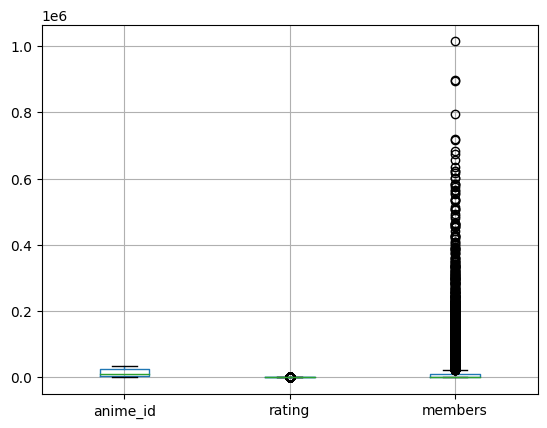

In [11]:
anime.boxplot()

In [12]:
rating_median=anime['rating'].median()
rating_median

6.57

In [16]:
anime.fillna({'rating':rating_median},inplace=True)

In [17]:
anime.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [18]:
def outlier_detection(data,colname):
  q1=data[colname].quantile(0.25)
  q2=data[colname].quantile(0.75)

  iqr=q2-q1
  upper_extreame=q2+(1.5*iqr)
  lower_extreame=q1-(1.5*iqr)
  return lower_extreame,upper_extreame,q1,q2

In [19]:
outlier_detection(anime,"members")

(-13722.5, 23481.5, 229.0, 9530.0)

In [20]:
anime[anime['members']>23481.5]

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
11530,746,Papa to Kiss in the Dark,"Comedy, Drama, Romance, Yaoi",OVA,2,6.47,28620
11566,8577,Aki-Sora: Yume no Naka,"Ecchi, Romance, Seinen, Yuri",OVA,2,6.41,37519
12209,5391,Pico to Chico,"Hentai, Yaoi",OVA,1,5.19,29463
12213,4866,Pico x CoCo x Chico,"Hentai, Yaoi",OVA,1,5.16,27411


In [21]:
anime.loc[anime['members']>23481.5,'members']=23481.5

<ipython-input-21-3deb0161453e>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23481.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  anime.loc[anime['members']>23481.5,'members']=23481.5


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='members'>

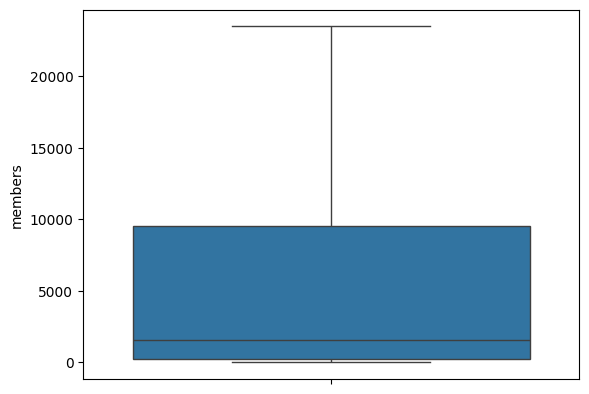

In [25]:
sns.boxplot(anime['members'])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

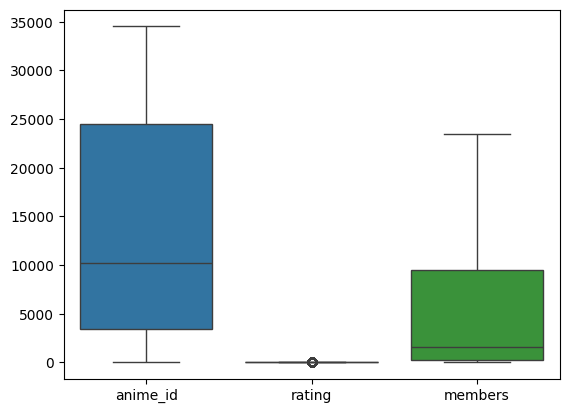

In [26]:
sns.boxplot(anime)

In [28]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,23481.5
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,23481.5
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,23481.5
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,23481.5
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,23481.5
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211.0
12290,5543,Under World,Hentai,OVA,1,4.28,183.0
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219.0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175.0


In [27]:
anime.describe()

,anime_id,rating,members
count,12210.000000,12210.000000,12210.000000
mean,13936.486486,6.479714,6336.902252
std,11398.045316,1.015796,8652.393973
min,1.000000,1.670000,5.000000
25%,3460.250000,5.900000,229.000000
50%,10168.500000,6.570000,1571.000000
75%,24442.500000,7.170000,9530.000000
max,34527.000000,10.000000,23481.500000


In [29]:
anime['anime_id'].value_counts()

,count
anime_id,
32281,1
22271,1
34249,1
25089,1
29791,1
...,...
20999,1
86,1
9040,1


In [30]:
anime['genre'].value_counts()

,count
genre,
Hentai,823
Comedy,523
Music,300
Kids,199
"Comedy, Slice of Life",179
...,...
"Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen",1
"Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen",1
"Adventure, Fantasy, Martial Arts, Sci-Fi, Shounen, Super Power",1


In [31]:
anime['type'].value_counts()

,count
type,
TV,3777
OVA,3310
Movie,2306
Special,1674
ONA,655
Music,488


In [32]:
from sklearn.preprocessing import MultiLabelBinarizer

In [34]:
anime['genre_list'] = anime['genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

In [35]:
anime

,anime_id,name,genre,type,episodes,rating,members,genre_list
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,23481.5,"[Drama, Romance, School, Supernatural]"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,23481.5,"[Action, Adventure, Drama, Fantasy, Magic, Mil..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,23481.5,"[Action, Comedy, Historical, Parody, Samurai, ..."
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,23481.5,"[Sci-Fi, Thriller]"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,23481.5,"[Action, Comedy, Historical, Parody, Samurai, ..."
...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211.0,[Hentai]
12290,5543,Under World,Hentai,OVA,1,4.28,183.0,[Hentai]
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219.0,[Hentai]
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175.0,[Hentai]


In [36]:
# One-hot encode the genres
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(anime['genre_list'])

In [37]:
genres_encoded

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

In [39]:
genres_df

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
cosine_sim = cosine_similarity(genres_df)
cosine_sim

array([[1.        , 0.18898224, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18898224, 1.        , 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.28571429, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [42]:
# Function to recommend similar anime based on cosine similarity
def recommend_anime(anime_title, cosine_sim=cosine_sim):
    # Get the index of the anime that matches the title
    idx = anime.index[anime['name'] == anime_title].tolist()[0]

    # Get the pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort anime by similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the most similar anime (excluding the target anime)
    sim_scores = sim_scores[1:11]
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar anime titles
    return anime['name'].iloc[anime_indices]

In [43]:
recommend_anime("Naruto")

,name
615,Naruto: Shippuuden
841,Naruto
1103,Boruto: Naruto the Movie - Naruto ga Hokage ni...
1343,Naruto x UT
1472,Naruto: Shippuuden Movie 4 - The Lost Tower
1573,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...
2458,Naruto Shippuuden: Sunny Side Battle
2997,Naruto Soyokazeden Movie: Naruto to Mashin to ...
175,Katekyo Hitman Reborn!
7628,Kyutai Panic Adventure!


In [47]:
from sklearn.model_selection import train_test_split

# Split the dataset (for demonstration, we use a simple train-test split)
train_df, test_df = train_test_split(anime, test_size=0.2, random_state=42)

In [48]:
train_df

,anime_id,name,genre,type,episodes,rating,members,genre_list
3796,19109,Fate/kaleid liner Prisma☆Illya Specials,"Comedy, Ecchi, Fantasy, Magic",Special,5,6.88,16886.0,"[Comedy, Ecchi, Fantasy, Magic]"
9684,16810,Narara Wondeogongju,"Action, Adventure, Sci-Fi, Space, Super Power",Movie,1,3.25,87.0,"[Action, Adventure, Sci-Fi, Space, Super Power]"
5648,22733,Dragon Collection,"Fantasy, Shounen",TV,51,6.39,3229.0,"[Fantasy, Shounen]"
3308,28431,Pokemon Omega Ruby &amp; Alpha Sapphire: Mega ...,"Action, Adventure, Fantasy, Kids",ONA,1,7.04,4068.0,"[Action, Adventure, Fantasy, Kids]"
4134,18099,Recorder to Randoseru Mi☆,"Comedy, School, Seinen, Slice of Life",TV,12,6.80,12240.0,"[Comedy, School, Seinen, Slice of Life]"
...,...,...,...,...,...,...,...,...
12046,5101,Doutei Kawaiya,Hentai,ONA,1,5.67,787.0,[Hentai]
5193,5917,Tsuru ni Notte: Tomoko no Bouken,Drama,Movie,1,6.53,321.0,[Drama]
5392,3880,Makyou Densetsu Acrobunch,"Mecha, Sci-Fi, Shounen",TV,24,6.47,318.0,"[Mecha, Sci-Fi, Shounen]"
860,22819,Aikatsu! Movie,"Music, School, Shoujo, Slice of Life",Movie,1,7.79,2813.0,"[Music, School, Shoujo, Slice of Life]"


In [49]:
test_df

,anime_id,name,genre,type,episodes,rating,members,genre_list
2920,3656,Monochrome Factor,"Action, Shounen Ai, Supernatural",TV,24,7.13,23481.5,"[Action, Shounen Ai, Supernatural]"
4563,7103,Miracle☆Train: Oedo-sen e Youkoso,"Fantasy, Shoujo",TV,13,6.69,13898.0,"[Fantasy, Shoujo]"
5208,4756,Hello Harinezumi: Satsui no Ryoubun,"Drama, Mystery, Psychological, Seinen",OVA,1,6.52,1213.0,"[Drama, Mystery, Psychological, Seinen]"
3102,4876,Hashire Melos!,"Action, Adventure, Historical",Movie,1,7.08,1932.0,"[Action, Adventure, Historical]"
8224,30839,Big X Episode 0,"Action, Historical, Sci-Fi, Shounen",Special,1,5.70,55.0,"[Action, Historical, Sci-Fi, Shounen]"
...,...,...,...,...,...,...,...,...
8358,10040,Chinpui: Eri-sama Katsudou Daishashin,Comedy,Movie,1,6.00,107.0,[Comedy]
2628,9733,The TV Show,Music,Music,1,7.21,2066.0,[Music]
11354,22039,Mou Hasamazu ni wa Irarenai♥: Hoshi ni Onegai ...,Hentai,OVA,1,6.77,1990.0,[Hentai]
7992,4567,Armageddon,"Action, Adventure, Sci-Fi",Movie,1,4.23,810.0,"[Action, Adventure, Sci-Fi]"


In [51]:
# Example of how to get recommendations for an anime in the test set
def recommend_anime_for_test(test_anime_title, cosine_sim, train_df):
    # Check if the anime exists in train_df before proceeding
    if test_anime_title in train_df['name'].values:
        idx = train_df.index[train_df['name'] == test_anime_title].tolist()[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]  # Top 10 most similar anime
        anime_indices = [i[0] for i in sim_scores]
        return train_df['name'].iloc[anime_indices]
    else:
        return "Anime not found in training dataset." # Return a message if anime not found

# Get recommendations for a sample anime in the test set
recommendations = recommend_anime_for_test(test_df['name'].iloc[0], cosine_sim, train_df)
print(recommendations)

Anime not found in training dataset.
